To [dataset](https://drive.google.com/file/d/1JMp2i3aTe46Dnl5gp8ulKRBpoBahM5ux/view?usp=sharing) περιέχει wide-area TCP συνδέσεις μεταξύ του Lawrence Berkeley Laboratory (LBL) και του υπόλοιπου κόσμου για χρονικό διάστημα τριάντα ημερών. 

Τα πρώτα εφτά features του dataset με τα οποία θα εργαστούμε είναι τα ακόλουθα:



1.   timestamp
2.   duration
3.   protocol
4.   bytes sent by originator of the connection, or ? if not available
5.   bytes sent by responder to the connection, or ? if not available
6.   local host - the (renumbered) LBL host that participated in the connection
7.   remote host - the remote (non-LBL) host that participated in the connection.









 

1. Ποιος **remote host** έχει τα περισσότερα connections με το LBL και ποιοι είναι οι local host που έχει συνδεθεί;

In [ ]:
import pandas as pd
import time
from google.colab import drive
drive.mount('/content/gdrive')

COLUMN_NAMES=['Timestamp','Duration','Protocol','OriginatorBytes','ResponderBytes','LocalHost','RemoteHost','State','Flag']
df = pd.read_csv("gdrive/My Drive/Lessons/lbl-conn-7.red", delimiter=' ', names=COLUMN_NAMES)
max=df['RemoteHost'].mode().tolist()

local_host_list=df.loc[df['RemoteHost'] == max[0],'LocalHost'].tolist()

print(max[0])
print(local_host_list)





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
192.35.222.222
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1

2. Ποιος **local host** δέχεται το μεγαλύτερο όγκο δεδομένων (bytes sent by responder);

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

COLUMN_NAMES=['Timestamp','Duration','Protocol','OriginatorBytes','ResponderBytes','LocalHost','RemoteHost','State','Flag']
df = pd.read_csv("gdrive/My Drive/Lessons/lbl-conn-7.red", delimiter=' ', names=COLUMN_NAMES)
df['ResponderBytes'].replace({"?": int(0)}, inplace=True)
df['ResponderBytes']=pd.to_numeric(df['ResponderBytes'])

max_responder_bytes=df['ResponderBytes'].max()

local_host=df.loc[df['ResponderBytes'] == max_responder_bytes,'LocalHost'].item()

print(max_responder_bytes)
print(local_host)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
76226561
799


3.Για κάθε **protocol** εμφανίστε το μικρότερο  και μεγαλύτερο duration στα conection του.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

COLUMN_NAMES=['Timestamp','Duration','Protocol','OriginatorBytes','ResponderBytes','LocalHost','RemoteHost','State','Flag']
df = pd.read_csv("gdrive/My Drive/Lessons/lbl-conn-7.red", delimiter=' ', names=COLUMN_NAMES)
df['Duration'].replace({"?": int(0)}, inplace=True)
df['Duration']=pd.to_numeric(df['Duration'])


protocols=df['Protocol'].unique().tolist()

for i in protocols:
   duration_list=df.loc[df['Protocol'] == i,'Duration']
   print("Protocol: ",i,"Max: ",duration_list.max(),"Min: ",duration_list.min())
   






Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Protocol:  smtp Max:  656924.0 Min:  0.0
Protocol:  nntp Max:  1307700.0 Min:  0.0
Protocol:  ftp Max:  1214580.0 Min:  0.0
Protocol:  ftp-data Max:  1033850.0 Min:  0.0
Protocol:  auth Max:  12.102 Min:  0.0
Protocol:  telnet Max:  1454750.0 Min:  0.0
Protocol:  domain Max:  918535.0 Min:  0.0
Protocol:  X.500DSA Max:  40369.1 Min:  0.0
Protocol:  finger Max:  570774.0 Min:  0.0
Protocol:  iso-tsap Max:  86.326 Min:  0.0
Protocol:  other-1993 Max:  21510.1 Min:  0.0
Protocol:  other-1729 Max:  14168.2 Min:  0.0
Protocol:  isode-dua Max:  680.997 Min:  0.0
Protocol:  hostnames Max:  33423.0 Min:  0.0
Protocol:  login Max:  704044.0 Min:  0.0
Protocol:  www Max:  1212930.0 Min:  0.0
Protocol:  ftpdata-1113 Max:  2.36486 Min:  0.06679
Protocol:  ftpdata-1114 Max:  5.24527 Min:  0.079491
Protocol:  ftpdata-1160 Max:  3.57707 Min:  0.342153
Protocol:  ftpdata-1

4. Τα missing values των **bytes sent (by originator/responder)** του traffic θα τα αντικαταστήσετε με τον average των values του αντίστοιχου **protocol**. Τα missing values δηλώνονται με το χαρακτήρα "?".

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

COLUMN_NAMES=['Timestamp','Duration','Protocol','OriginatorBytes','ResponderBytes','LocalHost','RemoteHost','State','Flag']
df = pd.read_csv("gdrive/My Drive/Lessons/lbl-conn-7.red", delimiter=' ', names=COLUMN_NAMES)
all_originator_bytes=df['OriginatorBytes'].tolist()
all_responder_bytes=df['ResponderBytes'].tolist()

df['OriginatorBytes'].replace({"?": int(0)}, inplace=True)
df['ResponderBytes'].replace({"?": int(0)}, inplace=True)
df['OriginatorBytes']=pd.to_numeric(df['OriginatorBytes'])
df['ResponderBytes']=pd.to_numeric(df['ResponderBytes'])

protocols=df['Protocol'].unique().tolist()


Originator_List_Protocol=[]
Originator_List_Mean=[]


for i in protocols:
   Originator_bytes_list=df.loc[df['Protocol'] == i,'OriginatorBytes']
   Originator_List_Protocol.append(i)
   Originator_List_Mean.append(Originator_bytes_list.mean())



Responder_List_Protocol=[]
Responder_List_Mean=[]

for i in protocols:
   try: 
    Responder_bytes_list=df.loc[df['Protocol'] == i,'ResponderBytes']
    Responder_List_Protocol.append(i)
    Responder_List_Mean.append(Responder_bytes_list.mean())
   except:
    print("COULD NOT REACH")


all_protocols=df['Protocol'].tolist()

for i in range(df['OriginatorBytes'].size):
  if all_originator_bytes[i]=="?":
    index = Originator_List_Protocol.index(all_protocols[i])
    all_originator_bytes[i]=Originator_List_Mean[index]



for i in range(df['ResponderBytes'].size):
  if all_responder_bytes[i]=="?":
    index = Responder_List_Protocol.index(all_protocols[i])
    all_responder_bytes[i]=Responder_List_Mean[index]


df['OriginatorBytes']=all_originator_bytes
df['ResponderBytes']=all_responder_bytes
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Timestamp,Duration,Protocol,OriginatorBytes,ResponderBytes,LocalHost,RemoteHost,State,Flag
0,7.481628e+08,1.24383,smtp,3631.064106,247.530144,1,128.97.154.3,REJ,L
1,7.481628e+08,3.96513,smtp,1173,328,3,128.8.142.5,SF,NaN
2,7.481628e+08,1.02839,nntp,58,129,2,140.98.2.1,SF,L
3,7.481628e+08,138.168,nntp,363238,1200,4,128.49.4.103,SF,L
4,7.481628e+08,10.0858,nntp,230,100,4,128.32.133.1,SF,N
...,...,...,...,...,...,...,...,...,...
782276,7.507548e+08,?,smtp,3631.064106,247.530144,7,138.96.32.20,S0,L
782277,7.507548e+08,?,smtp,3631.064106,247.530144,17,128.115.12.40,S0,L
782278,7.507548e+08,?,nntp,77874.477219,2382.46734,4,128.54.16.3,S1,L
782279,7.507548e+08,?,telnet,330.829859,6888.033674,12,192.35.222.222,S1,L


5. Ποια ώρα της ημέρας κατα μέσο όρο έχουμε το μικρότερο traffic; Ως traffic θα ορίσουμε το συνολικό άθροισμα **bytes sent by originator** και **bytes sent by responder**.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
from datetime import datetime



def parser(x):
	return datetime.fromtimestamp(float(x))
 

COLUMN_NAMES=['Timestamp','Duration','Protocol','OriginatorBytes','ResponderBytes','LocalHost','RemoteHost','State','Flag']
df = pd.read_csv("gdrive/My Drive/Lessons/lbl-conn-7.red", delimiter=' ', names=COLUMN_NAMES,header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

df['OriginatorBytes'].replace({"?": int(0)}, inplace=True)
df['ResponderBytes'].replace({"?": int(0)}, inplace=True)
df['OriginatorBytes']=pd.to_numeric(df['OriginatorBytes'])
df['ResponderBytes']=pd.to_numeric(df['ResponderBytes'])


def func(x):
   a = x['OriginatorBytes'].sum()
   b= x['ResponderBytes'].sum()
   return pd.Series(a+b)


my_custom_df=df.groupby(pd.Grouper(freq='1H')).apply(func)
my_custom_df.columns=["Traffic"]
my_custom_df['Timestamp'] = my_custom_df.index


hour = pd.to_timedelta(my_custom_df['Timestamp'].dt.hour, unit='H')
hour.name = 'Hour'
result = my_custom_df.groupby(hour).mean()
result.idxmin()





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Traffic   0 days 10:00:00
dtype: timedelta64[ns]

6. Φτιάξτε μια χρονοσειρά με step τα 10 λεπτά και value το traffic του κάθε 10 λεπτά.

In [ ]:
import pandas as pd
import time
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt
import datetime

def parser(x):
	return datetime.datetime.fromtimestamp(float(x))
 
COLUMN_NAMES=['Timestamp','Duration','Protocol','OriginatorBytes','ResponderBytes','LocalHost','RemoteHost','State','Flag']
series = pd.read_csv("gdrive/My Drive/Lessons/lbl-conn-7.red", delimiter=' ', names=COLUMN_NAMES,header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series['OriginatorBytes'].replace({"?": int(0)}, inplace=True)
series['ResponderBytes'].replace({"?": int(0)}, inplace=True)
series['OriginatorBytes']=pd.to_numeric(series['OriginatorBytes'])
series['ResponderBytes']=pd.to_numeric(series['ResponderBytes'])


def func(x):
   a = x['OriginatorBytes'].sum()
   b= x['ResponderBytes'].sum()
   return pd.Series(a+b)




my_custom_df=series.groupby(pd.Grouper(freq='10Min')).apply(func)
my_custom_df.columns=["values"]
my_custom_df



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,values
Timestamp,
1993-09-16 07:00:00,1985696
1993-09-16 07:10:00,3647642
1993-09-16 07:20:00,1540918
1993-09-16 07:30:00,1458470
1993-09-16 07:40:00,2244647
...,...
1993-10-16 06:10:00,2671854
1993-10-16 06:20:00,1540283
1993-10-16 06:30:00,1505695


7. Αναπαραστήσετε το Timeplot της χρονοσειράς του traffic.

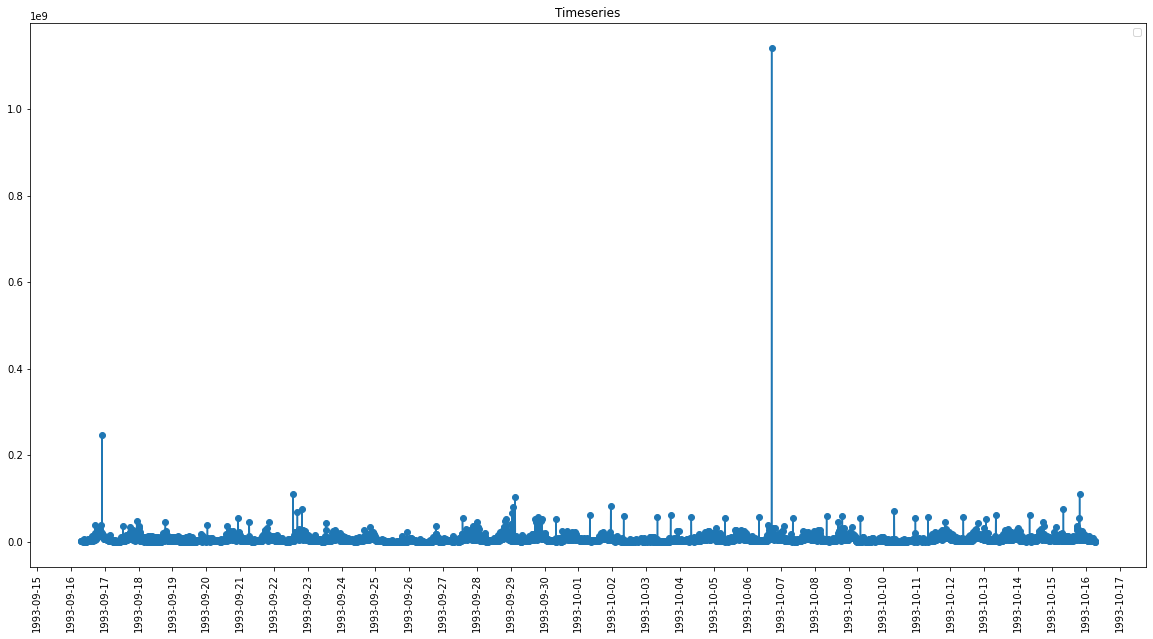

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# General routine for plotting time series data
def plot_timeseries_df(df, attrib, ticker_loc=1, title='Timeseries', 
                       legend=''):
    fig = plt.figure(figsize=(20,10))
    plt.plot(df[attrib], 'o-')
    _ = plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(ticker_loc))
    plt.title(title)
    plt.gca().legend(legend)
    plt.show()


plot_timeseries_df(my_custom_df.loc["1993-09-16":"1993-10-16"], "values",
                   ticker_loc=1, title="Timeseries", legend='')





8. Αναπαραστήστε το decompose σε trend, seasonality και residuals για την χρονοσειρά του traffic.

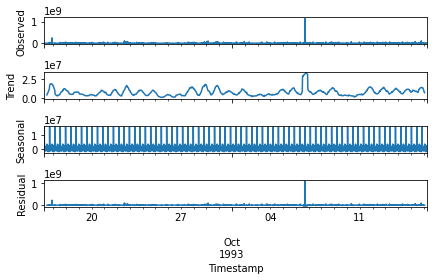

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot


result = seasonal_decompose(my_custom_df['values'], model='additive',freq=60)
result.plot()
pyplot.show()

9. Εφαρμόστε ARMA το οποίο θα το εκπαιδεύσετε στο πρώτο 70% των timesteps της χρονοσειράς.

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = my_custom_df.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

model = ARMA(history, order=(1,1,))
model_fit = model.fit(disp=0)
print(model_fit.summary())



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3024
Model:                     ARMA(1, 1)   Log Likelihood              -55467.234
Method:                       css-mle   S.D. of innovations       22373346.346
Date:                Tue, 17 May 2022   AIC                         110942.468
Time:                        15:24:28   BIC                         110966.526
Sample:                             0   HQIC                        110951.118
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.495e+06   7.98e+05      9.391      0.000    5.93e+06    9.06e+06
ar.L1.y        0.9526      0.014     68.609      0.000       0.925       0.980
ma.L1.y       -0.9067      0.019    -48.277      0.0

10. Αξιολογηστε τα αποτελέσματα στο υπόλοιπο των 30% των timesteps.

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = my_custom_df.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in test]
predictions = list()

predictions=[]
for t in range(len(test)):
	model = ARMA(history, order=(2,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=5219031.594308, expected=2459311.000000
predicted=5424477.838455, expected=2076874.000000
predicted=5602633.123961, expected=5795304.000000
predicted=6188836.834288, expected=4620625.000000
predicted=6865149.822818, expected=5096588.000000
predicted=6668444.657163, expected=1427257.000000
predicted=6108461.502392, expected=3273581.000000
predicted=5560964.515673, expected=56188029.000000
predicted=15638406.915716, expected=3083455.000000
predicted=18707182.492459, expected=1626727.000000
predicted=5754340.351025, expected=2919898.000000
predicted=5644037.163597, expected=2750531.000000
predicted=5908892.978141, expected=7788849.000000
predicted=6766661.868003, expected=2226965.000000
predicted=6939144.348001, expected=2526984.000000
predicted=5702292.864086, expected=5332044.000000
predicted=6269900.709755, expected=4804627.000000
predicted=6823038.933645, expected=1088026.000000
predicted=6034428.449545, expected=2511465.000000
predicted=5423810.251497, expected=1316768.0000

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=6961424.994711, expected=3500281.000000
predicted=6332988.027799, expected=3886178.000000
predicted=6218674.557732, expected=3935981.000000
predicted=6315063.328462, expected=2426318.000000
predicted=6048019.011456, expected=6986389.000000
predicted=6528724.409212, expected=3079914.000000
predicted=6873724.343796, expected=3692716.000000
predicted=6074749.309235, expected=2325195.000000
predicted=5964094.813047, expected=2264848.000000
predicted=5630977.975296, expected=2276279.000000
predicted=5615056.179257, expected=2026168.000000
predicted=5567762.384699, expected=5897443.000000
predicted=6217467.379526, expected=61124374.000000
predicted=17237534.900512, expected=3631244.000000
predicted=19572412.806530, expected=4363510.000000
predicted=6386148.181809, expected=5534183.000000
predicted=6757605.145636, expected=3548692.000000
predicted=6664064.473018, expected=2822303.000000
predicted=6086225.807004, expected=2483117.000000
predicted=5859141.574616, expected=6711787.0000

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=5366173.182051, expected=2252037.000000
predicted=5510508.888959, expected=3585511.000000
predicted=5872502.573431, expected=6312965.000000
predicted=6677868.496360, expected=7385827.000000
predicted=7508465.708567, expected=4949264.000000
predicted=7315494.415960, expected=6474612.000000
predicted=7023323.302931, expected=1570193.000000
predicted=6486479.411903, expected=1285752.000000
predicted=5286073.690958, expected=3773875.000000
predicted=5669691.943003, expected=7074041.000000
predicted=6850522.902754, expected=2096071.000000
predicted=6713497.573106, expected=1201165.000000
predicted=5384189.198480, expected=2620132.000000
predicted=5430266.771442, expected=4764571.000000
predicted=6151029.257569, expected=3279517.000000
predicted=6379214.193467, expected=9233717.000000
predicted=7117772.536989, expected=3669663.000000
predicted=7494728.787825, expected=10660071.000000
predicted=7466753.031201, expected=4463957.000000
predicted=7973878.498292, expected=5817498.000000

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=8363073.442031, expected=11236775.000000
predicted=8564491.436811, expected=13182145.000000
predicted=9711333.331534, expected=9505907.000000
predicted=9424932.046943, expected=8398138.000000
predicted=8374474.617620, expected=12915737.000000
predicted=9018267.248445, expected=4646845.000000
predicted=8405182.596594, expected=5845412.000000
predicted=6771031.279497, expected=3434379.000000
predicted=6564250.417381, expected=11723218.000000
predicted=7657850.377503, expected=12164757.000000
predicted=9620673.182524, expected=7807262.000000
predicted=8858959.651643, expected=5275629.000000
predicted=7373234.546627, expected=2425645.000000
predicted=6236338.264445, expected=6558010.000000
predicted=6409456.622438, expected=5919370.000000
predicted=7216029.831654, expected=5057880.000000
predicted=6900658.218762, expected=7078099.000000
predicted=7105363.641423, expected=5235427.000000
predicted=7196650.274272, expected=7898521.000000
predicted=7306980.954197, expected=9424530.00

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=8584739.342124, expected=14711664.000000
predicted=8215536.038159, expected=77135953.000000
predicted=23271744.004718, expected=13176700.000000
predicted=24474700.996163, expected=13969688.000000
predicted=10297395.229049, expected=3455139.000000
predicted=8407638.777442, expected=3622911.000000
predicted=6131390.300091, expected=1919365.000000
predicted=5831724.482373, expected=4253107.000000
predicted=5914717.458994, expected=2657763.000000
predicted=6111835.909502, expected=13131964.000000
predicted=7818890.994381, expected=6956751.000000
predicted=8906009.897635, expected=3045155.000000
predicted=6782172.691201, expected=2992277.000000
predicted=5912355.368123, expected=3367888.000000
predicted=5972880.126319, expected=6778760.000000
predicted=6724854.631768, expected=13391525.000000
predicted=8772809.300929, expected=5707100.000000
predicted=8713164.090462, expected=3393993.000000
predicted=6573623.585640, expected=3635618.000000
predicted=6113057.022268, expected=493853